In [22]:
import sys
import os

# Add the workspace directory to the system path
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the class
from model import preprocess_data
from model.train import HST

In [23]:
import tensorflow as tf

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-08-14 18:33:24.050679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-14 18:33:24.189513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-14 18:33:24.189888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
%matplotlib inline

In [8]:
import tensorflow as tf
tf.data.experimental.save(
    train_dataset, path= "train_dataset"
)

In [24]:
loaded = tf.data.experimental.load(
    "/home/annalena/PedestrianTrajectoryPrediction/datasets/test_dataset_odom_aug"
)

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 3775467272980396666


In [4]:
loaded = tf.data.experimental.load(
    "/home/annalena/PedestrianTrajectoryPrediction/test_synthetic_2d_l3/content/test_synthetic_2d_l3"
)

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


2024-08-13 15:59:47.920586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 15:59:47.973878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 15:59:47.974402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 15:59:47.978641: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 15:59:47.979393: I tensorflow/compile

In [25]:
import datetime
import tensorflow as tf

ckpt_best_dir = "/home/annalena/PedestrianTrajectoryPrediction/odom_aug/ckpts_best/ckpt"

def test_model(checkpoint_dir, test_dataset):
    
    model = HST(15)  # Initialize the model architecture
    optimizer = tf.keras.optimizers.Adam()
    
    # Create a checkpoint object
    checkpoint = tf.train.Checkpoint(model=model, optimizer=optimizer)
    
    # Restore the latest checkpoint
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    if latest_checkpoint:
        checkpoint.restore(latest_checkpoint)
        print(f"Restored checkpoint from {latest_checkpoint}")
    else:
        print("No checkpoint found.")
        return
    
    # Run a forward pass with a batch from the test dataset
    for (batch_x1, batch_x2) in test_dataset.take(1):
        input_batch = (batch_x1, batch_x2)
        output_dict, pred = model(input_batch, training=False)
        #print(output)
        break
    return output_dict, pred, input_batch


In [26]:
output_dict, pred, input = test_model(ckpt_best_dir, loaded)

Restored checkpoint from /home/annalena/PedestrianTrajectoryPrediction/odom_aug/ckpts_best/ckpt/ckpt-5


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 3775467272980396666


In [27]:
%matplotlib inline

In [28]:
pred["mixture_logits"]

<tf.Tensor: shape=(32, 1, 5), dtype=float32, numpy=
array([[[ 0.02497653,  0.0236996 , -0.03996962,  0.03756865,
          0.03152268]],

       [[ 0.03055543,  0.0286484 , -0.02033912,  0.04138149,
          0.03611643]],

       [[ 0.01809515,  0.01506408, -0.04863701,  0.0303345 ,
          0.02365879]],

       [[ 0.01809638,  0.01508073, -0.04877305,  0.03036063,
          0.02367721]],

       [[ 0.02063361,  0.01951363, -0.04950621,  0.03381596,
          0.02742417]],

       [[ 0.01252701,  0.01293756,  0.00388629,  0.02084399,
          0.0176208 ]],

       [[ 0.01972071,  0.01700293, -0.04673218,  0.03201992,
          0.02550657]],

       [[ 0.01608772,  0.01110932, -0.0419798 ,  0.02609506,
          0.01949054]],

       [[ 0.01822598,  0.01518446, -0.04852686,  0.0304675 ,
          0.02378959]],

       [[ 0.02083487,  0.01889314, -0.04606727,  0.03337803,
          0.0270616 ]],

       [[ 0.01905069,  0.01759438, -0.05200823,  0.03229191,
          0.0257374 ]],

  

In [29]:
pred["position"][0,:,0,:2]

<tf.Tensor: shape=(15, 2), dtype=float32, numpy=
array([[-0.9371219 , -0.38643432],
       [-2.4388633 , -1.4913988 ],
       [-2.9974215 , -1.2570841 ],
       [-2.9833953 ,  0.45186985],
       [-2.6082745 ,  1.2051358 ],
       [-2.3806267 ,  0.50282013],
       [-1.150934  ,  3.1491013 ],
       [-1.2139196 ,  3.159577  ],
       [-1.1876585 ,  3.1215024 ],
       [-1.1798146 ,  3.1270454 ],
       [-1.2889202 ,  3.114056  ],
       [-1.31459   ,  3.1222942 ],
       [-1.3458209 ,  3.0672789 ],
       [-1.2890065 ,  3.129775  ],
       [-1.358274  ,  3.0767064 ]], dtype=float32)>

/tmp/ipykernel_11388/112680072.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


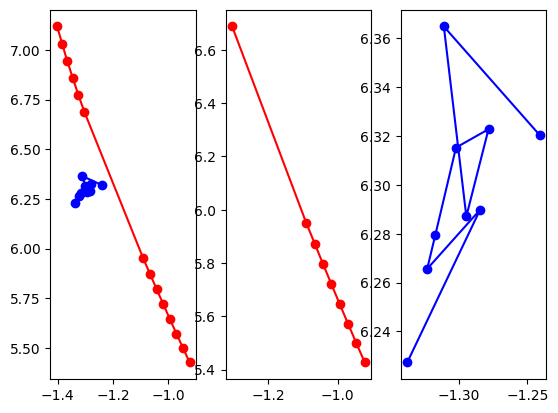

In [37]:
import matplotlib.pyplot as plt 
import numpy as np 

idx = 1

mode =3

ground_truth = input[0][idx][:,:2].numpy()
prediction = pred["position"][idx,:,mode,:2].numpy()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(ground_truth[1:,0], ground_truth[1:,1], 'ro-')
ax1.plot(prediction[6:,0], prediction[6:,1],'bo-')
ax2.plot(ground_truth[6:,0], ground_truth[6:,1], 'ro-')
ax3.plot(prediction[6:,0], prediction[6:,1],'bo-')
fig.show()

In [10]:
prediction

array([[-0.21553525, -0.03838827],
       [-0.16171409,  0.07452854],
       [-0.1618135 ,  0.07464612],
       [-0.16172779,  0.0746796 ],
       [-0.16172747,  0.07479997],
       [-0.16176964,  0.07472967],
       [-0.1637809 ,  0.02403552],
       [-0.16363353,  0.02353285],
       [-0.16364695,  0.02300084],
       [-0.16372512,  0.02258127],
       [-0.16382676,  0.02248896],
       [-0.16380595,  0.02272726],
       [-0.16376704,  0.02319433],
       [-0.16377345,  0.02361044],
       [-0.16379225,  0.02374719]], dtype=float32)

In [11]:
ground_truth

array([[-9.91435010e+01,  8.83475909e+01],
       [-9.63965328e-03,  6.48002861e-02],
       [-9.63965328e-03,  6.48002861e-02],
       [ 1.06159366e-04,  1.12360975e-01],
       [ 6.85870772e-04,  1.13650911e-01],
       [ 1.52057174e-03,  5.51333643e-02],
       [ 1.52057174e-03,  5.51333643e-02],
       [ 3.28008410e-02, -8.91633604e-02],
       [ 3.28008410e-02, -8.91633604e-02],
       [ 6.95928442e-02, -9.87210010e-02],
       [ 6.95928442e-02, -9.87210010e-02],
       [ 6.03811574e-02, -5.19433907e-02],
       [ 4.77498183e-01, -7.33223353e-01],
       [ 4.33753179e-02, -1.53608534e-01],
       [ 1.17056532e-01, -3.05332226e-01]])

In [9]:
idx = 5

mode = 0

ground_truth = input[0][idx][:,:2].numpy()
prediction = pred["position"][idx,:,mode,:2].numpy()


new_pos = [ground_truth[0] + i for i in prediction[1:]]
new_pos.insert(0,ground_truth[0])
new_pos = np.asarray(new_pos)


tmp = []
tmp.append(ground_truth[0])
ground_truth_ = np.asarray(ground_truth)
for i in range(1,len(ground_truth_)):
    tmp.append(np.add(np.asarray(tmp[-1]),ground_truth_[i]))

tmp = np.asarray(tmp)

tmp2 = []
for i in range(5):
    tmp2.append(tmp[i])
prediction_ = np.asarray(prediction)
for i in range(6,len(prediction)):
    tmp2.append(np.add(np.asarray(tmp2[-1]),prediction[i]))

tmp2 = np.asarray(tmp2)

plt.plot(tmp2[:,0], tmp2[:,1], 'bo-')
plt.plot(tmp[:,0], tmp[:,1],'ro-')
plt.show()

NameError: name 'np' is not defined

In [14]:
print(prediction)

[[ 0.43505102 -1.1941148 ]
 [ 0.27338412 -1.3159314 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.27338412 -1.3159314 ]
 [ 0.27338412 -1.3159314 ]
 [ 0.27338412 -1.3159314 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941148 ]
 [ 0.43505102 -1.1941144 ]
 [ 0.43505102 -1.1941144 ]
 [ 0.43505102 -1.1941144 ]]


# Plot training loss

In [13]:
import pandas as pd

train_loss_dir = "/home/pbr-student/Downloads/train.csv"
eval_loss_dir = "/home/pbr-student/Downloads/eval.csv"

train_loss = pd.read_csv(train_loss_dir)
eval_loss = pd.read_csv(eval_loss_dir)

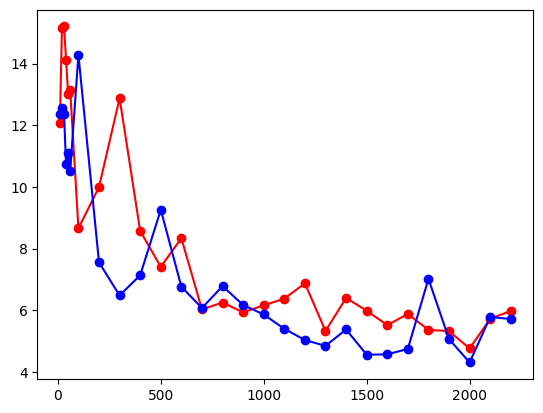

In [16]:
plt.plot(train_loss["Step"], train_loss["Value"], 'ro-')
plt.plot(eval_loss["Step"], eval_loss["Value"], 'bo-')
plt.show()